In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def read_outfile(name, nboulders=2):
    df = pd.read_csv(name, delimiter='\s+', header=None,
                      names=["idx",
                             "t",
                             "x", "y",
                             "vx", "vy",
                             "ax", "ay",
                             "mass", "radio"])
    df.name = name.split(".")[0]
    df.nt = df.idx.nunique()
    df.nb = nboulders
    df.np = df.nt - nboulders
    df["r"] = np.sqrt(df["x"]**2 + df["y"]**2)
    df["v"] = np.sqrt(df["vx"]**2 + df["vy"]**2)
    df["a"] = np.sqrt(df["ax"]**2 + df["ay"]**2)
    return df

def read_map(name):
    df = pd.read_csv(name, delimiter='\s+', header=None,
                     names=["x", "y", "pot", "ax", "ay"])
    df["r"] = np.sqrt(df["x"]**2 + df["y"]**2)
    df["acc"] = np.sqrt(df["ax"]**2 + df["ay"]**2)
    return df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_53325/1304380459.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(name, delimiter='\s+', header=None,
/tmp/ipykernel_53325/1304380459.py:19: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(name, delimiter='\s+', header=None,


In [3]:
dfs = []
dfs.append(read_outfile("out_ex_v1.dat"))
dfs.append(read_outfile("out_ex_v2.dat"))
dfs.append(read_outfile("out_im_v1.dat"))
dfs.append(read_outfile("out_im_v2.dat"))
dfs.append(read_outfile("out_im_v1_tor.dat"))
dfs.append(read_outfile("out_im_v2_tor.dat"))

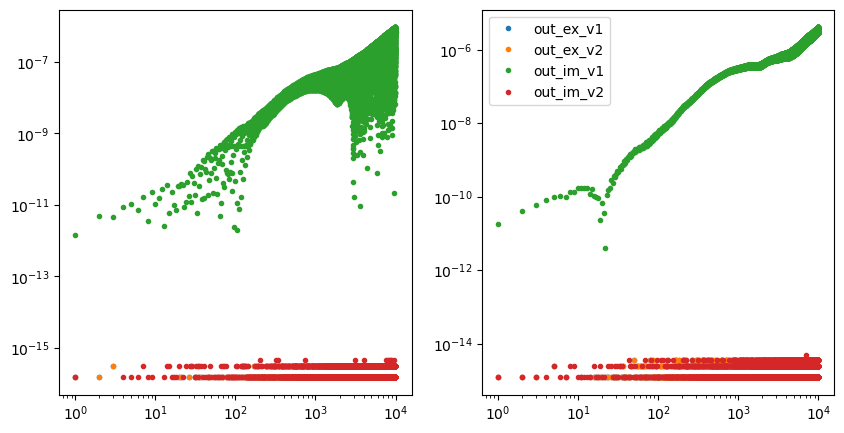

In [4]:
if len(dfs):
    fig, axs = plt.subplots(1, 2, sharex=True, figsize=(10, 5))
    for df in dfs[:4]:
        n = df.nt
        axs[0].plot(df["t"].iloc[::n], abs(df["r"].iloc[::n]-df["r"].iloc[0])/df["r"].iloc[0], ".", label=df.name)
        axs[1].plot(df["t"].iloc[1::n], abs(df["r"].iloc[1::n]-df["r"].iloc[1])/df["r"].iloc[0], ".", label=df.name)
    # plt.ticklabel_format(useOffset=False)
    for ax in axs.flat:
        ax.set_xscale("log")
        ax.set_yscale("log")    
    plt.legend()
    plt.show()

In [7]:
df

,idx,t,x,y,vx,vy,ax,ay,mass,radio,r,v,a
0,0,0.0,-11.727273,-0.000000,-0.000000,-252.488730,5436.094158,-0.000000e+00,6.300000e+18,129.000000,11.727273,252.488730,5436.094158
1,1,0.0,117.272727,0.000000,-0.000000,2524.887300,-54360.941576,-0.000000e+00,6.300000e+17,2.500000,117.272727,2524.887300,54360.941576
2,2,0.0,586.175745,0.000000,-0.000000,2426.997615,-10207.965049,2.109063e-14,0.000000e+00,586.175745,586.175745,2426.997615,10207.965049
3,3,0.0,450.198774,0.000000,-0.000000,2769.370869,-17542.454094,4.573665e-14,6.000000e+10,450.198774,450.198774,2769.370869,17542.454094
4,4,0.0,547.970930,0.000000,-0.000000,2524.625146,-11712.067735,2.571106e-14,8.000000e+16,547.970930,547.970930,2524.625146,11712.067735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,10000.0,11.502647,2.284300,-49.169024,247.591768,-5319.775383,-1.056449e+03,6.300000e+18,129.000000,11.727273,252.426774,5423.660698
49996,1,10000.0,-115.026474,-22.843003,491.690242,-2475.917676,53197.753827,1.056449e+04,6.300000e+17,2.500000,117.272727,2524.267742,54236.606984
49997,2,10000.0,-563.571722,-157.227394,654.088212,-2341.869617,9863.992679,2.766512e+03,0.000000e+00,585.092761,585.092761,2431.498446,10244.605316
49998,3,10000.0,300.341801,-334.081460,2067.670849,1866.460794,-11335.310243,1.281329e+04,6.000000e+10,449.238934,449.238934,2785.487145,17107.589504


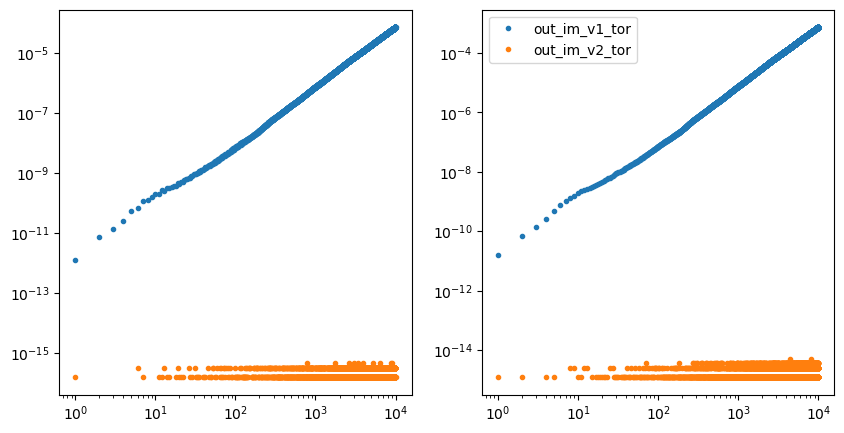

In [ ]:
if len(dfs) > 4:
    fig, axs = plt.subplots(1, 2, sharex=True, figsize=(10, 5))
    for df in dfs[4:]:
        n = df.nt
        axs[0].plot(df["t"].iloc[::n], abs(df["r"].iloc[::n]-df["r"].iloc[0])/df["r"].iloc[0], ".", label=df.name)
        axs[1].plot(df["t"].iloc[1::n], abs(df["r"].iloc[1::n]-df["r"].iloc[1])/df["r"].iloc[0], ".", label=df.name)
    # plt.ticklabel_format(useOffset=False)
    for ax in axs.flat:
        ax.set_xscale("log")
        ax.set_yscale("log")    
    plt.legend()
    plt.show()

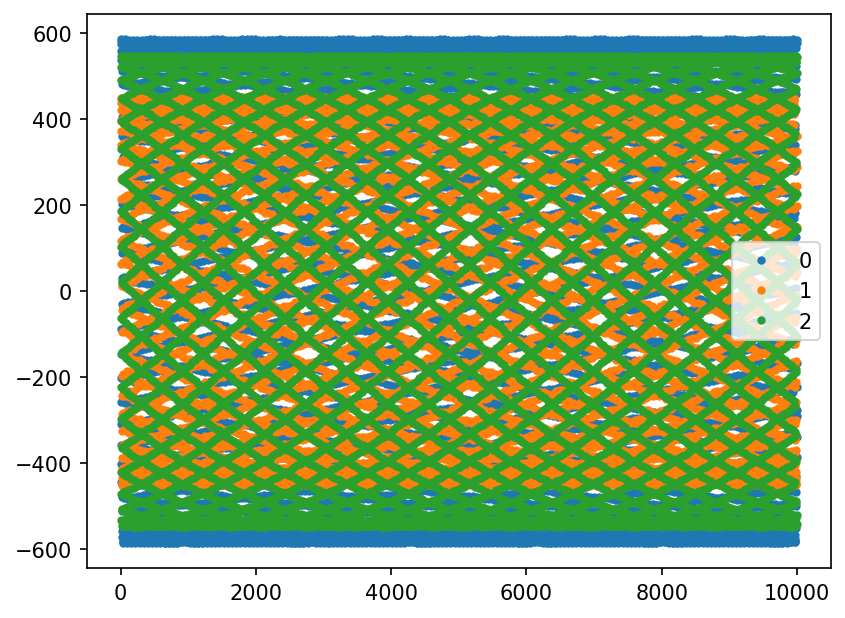

In [16]:
if len(dfs):
    df = dfs[2]
    n = df.nt
    plt.figure(dpi=150)
    for i in range(2, df.nt):
        # plt.plot(df["t"].iloc[i::n], abs(df["r"].iloc[i::n]-df["r"].iloc[i])/df["r"].iloc[i], ".", label=i)
        # plt.plot(df["x"].iloc[i::n], df["y"].iloc[i::n], ".", label=i-2)
        # plt.plot(df["vx"].iloc[i::n], df["vy"].iloc[i::n], ".", label=i-2)
        plt.plot(df["t"].iloc[i::n], df["x"].iloc[i::n], ".", label=i-2)
    # plt.axis("equal")
    plt.legend()
    plt.show()

In [6]:
mapa = read_map("mapa.dat")
mapa

,x,y,pot,ax,ay,r,acc
0,-298.8,-298.8,-8.188043e+06,13637.647888,13881.209086,422.567012,19459.532513
1,-298.8,-297.6,-8.204718e+06,13721.246615,13910.843617,421.719338,19539.298319
2,-298.8,-296.4,-8.221429e+06,13805.368530,13940.326199,420.873378,19619.400979
3,-298.8,-295.2,-8.238175e+06,13890.015655,13969.652417,420.029142,19699.840698
4,-298.8,-294.0,-8.254956e+06,13975.189986,13998.817791,419.186641,19780.617652
...,...,...,...,...,...,...,...
249995,300.0,295.2,-8.215355e+06,-13735.826207,-13923.900984,420.883642,19558.832792
249996,300.0,296.4,-8.198665e+06,-13652.708706,-13893.402460,421.726167,19478.785561
249997,300.0,297.6,-8.182011e+06,-13570.112596,-13862.782018,422.570420,19399.089699
249998,300.0,298.8,-8.165394e+06,-13488.035505,-13832.043451,423.416391,19319.744507


In [7]:
# Create pivot table
pivot = mapa.pivot_table(values=["pot", "acc", "ax", "ay"], index="x", columns="y")
pivot

acc                                                          \
y             -298.8        -297.6        -296.4        -295.2        -294.0   
x                                                                              
-298.8  19459.532513  19539.298319  19619.400979  19699.840698  19780.617652   
-297.6  19537.379437  19617.787080  19698.536974  19779.629362  19861.064455   
-296.4  19615.527066  19696.581613  19777.983885  19859.734162  19941.832692   
-295.2  19693.975117  19775.681664  19857.741486  19940.154900  20022.922194   
-294.0  19772.723272  19855.086942  19937.809513  20020.891343  20104.332758   
...              ...           ...           ...           ...           ...   
 295.2  19625.414667  19707.272033  19789.501702  19872.104543  19955.081406   
 296.4  19548.579677  19629.802076  19711.391269  19793.348079  19875.673312   
 297.6  19472.022702  19552.614764  19633.568177  19714.883723  19796.562164   
 298.8  19395.744178  19475.710511  19556.032821  19636.711847  19717.748311   
 300.0  19319.744507  19399.089699  19478.785561  19558.832792  19639.232072   

                                                                              \
y             -292.8        -291.6        -290.4        -289.2        -288.0   
x                                                                              
-298.8  19861.731983  19943.183805  20024.973198  20107.100206  20189.564843   
-297.6  19942.842433  20024.963445  20107.427604  20190.234995  20273.385664   
-296.4  20024.279692  20107.075347  20190.219809  20273.713197  20357.555596   
-295.2  20106.043622  20189.519406  20273.349738  20357.534774  20442.074635   
-294.0  20188.134050  20272.295483  20356.817284  20441.699651  20526.942742   
...              ...           ...           ...           ...           ...   
 295.2  20038.433121  20122.160499  20206.264332  20290.745388  20375.604419   
 296.4  19958.367756  20041.432177  20124.867320  20208.673912  20292.852658   
 297.6  19878.604245  19961.010688  20043.782196  20126.919452  20210.423115   
 298.8  19799.142914  19880.896337  19963.009239  20045.482261  20128.316020   
 300.0  19719.984059  19801.089395  19882.548698  19964.362564  20046.531571   

        ...           pot                                            \
y       ...         289.2         290.4         291.6         292.8   
x       ...                                                           
-298.8  ... -8.322427e+06 -8.305508e+06 -8.288623e+06 -8.271772e+06   
-297.6  ... -8.339631e+06 -8.322606e+06 -8.305616e+06 -8.288662e+06   
-296.4  ... -8.356870e+06 -8.339740e+06 -8.322645e+06 -8.305586e+06   
-295.2  ... -8.374145e+06 -8.356909e+06 -8.339708e+06 -8.322544e+06   
-294.0  ... -8.391456e+06 -8.374113e+06 -8.356806e+06 -8.339536e+06   
...     ...           ...           ...           ...           ...   
 295.2  ... -8.367589e+06 -8.350301e+06 -8.333052e+06 -8.315841e+06   
 296.4  ... -8.350479e+06 -8.333296e+06 -8.316151e+06 -8.299044e+06   
 297.6  ... -8.333403e+06 -8.316324e+06 -8.299283e+06 -8.282279e+06   
 298.8  ... -8.316360e+06 -8.299386e+06 -8.282447e+06 -8.265546e+06   
 300.0  ... -8.299352e+06 -8.282480e+06 -8.265645e+06 -8.248845e+06   

                                                                              \
y              294.0         295.2         296.4         297.6         298.8   
x                                                                              
-298.8 -8.254956e+06 -8.238175e+06 -8.221429e+06 -8.204718e+06 -8.188043e+06   
-297.6 -8.271743e+06 -8.254859e+06 -8.238011e+06 -8.221199e+06 -8.204424e+06   
-296.4 -8.288563e+06 -8.271577e+06 -8.254626e+06 -8.237712e+06 -8.220835e+06   
-295.2 -8.305417e+06 -8.288326e+06 -8.271273e+06 -8.254257e+06 -8.237278e+06   
-294.0 -8.322304e+06 -8.305109e+06 -8.287952e+06 -8.270832e+06 -8.253751e+06   
...              ...           ...           ...           ...           ...   
 295.2 -8.298669e+06 -8.281536e+06 -8.264442e+06 -8.247387e+

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

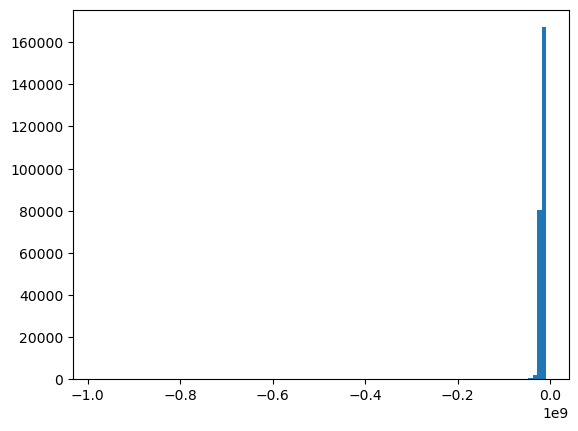

In [8]:
plt.hist(mapa["pot"], bins=100)

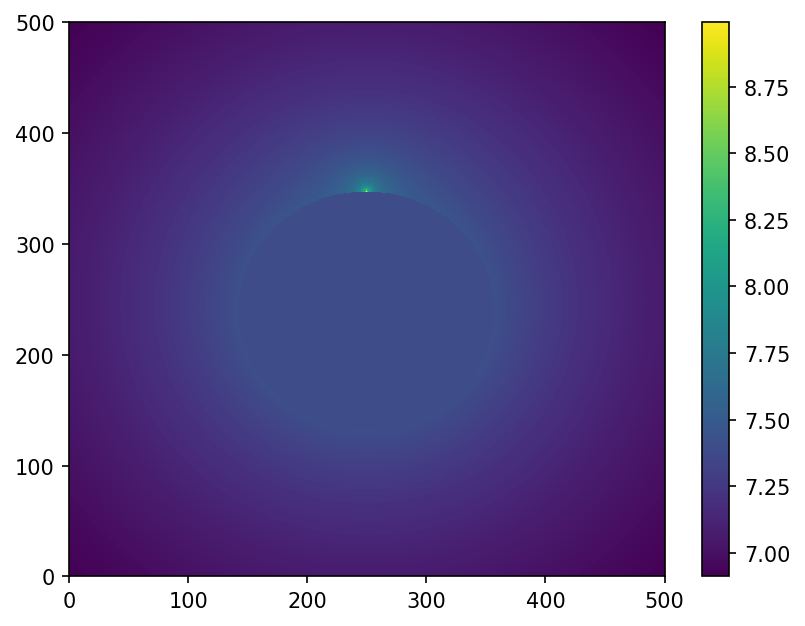

In [9]:
# Plot the potential, with pcolormesh
plt.figure(dpi=150)
plt.pcolormesh(np.log10(pivot["pot"].abs()))
plt.colorbar()
plt.show()

/home/emmanuel/miniconda3/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


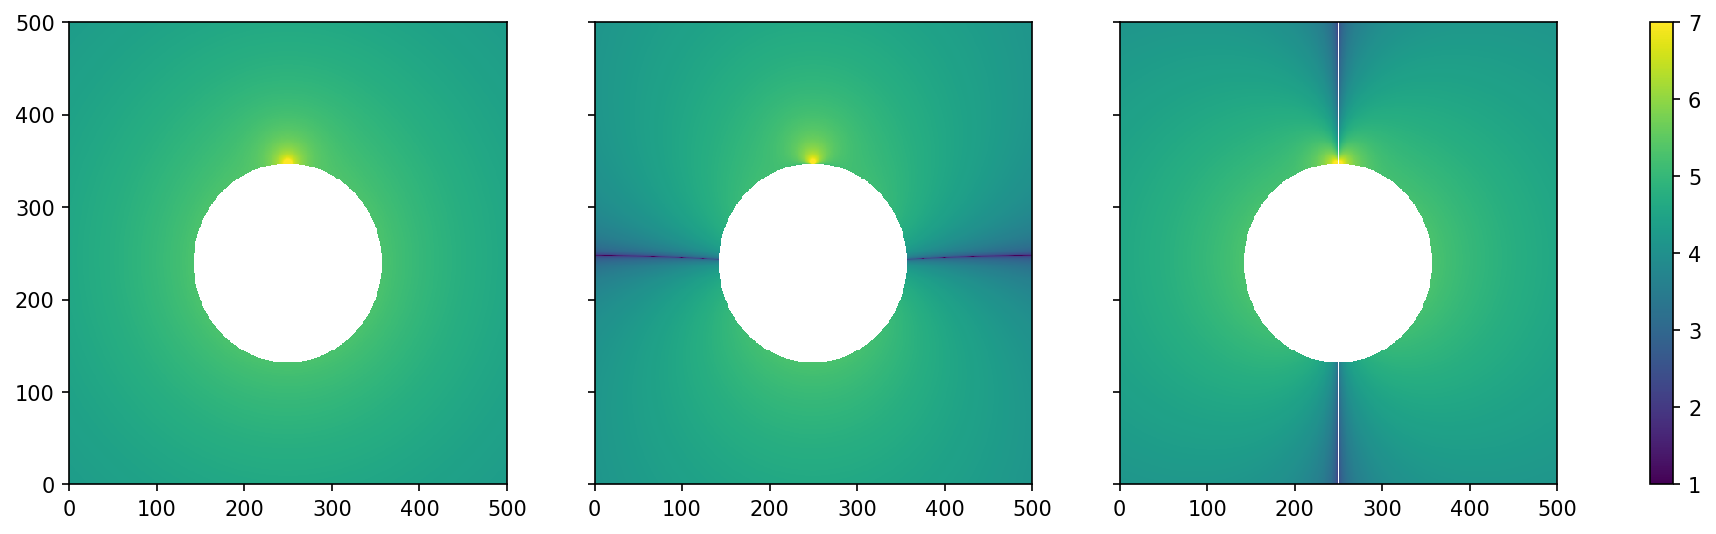

In [10]:
# Plot the potential, with pcolormesh
fig, axs = plt.subplots(1,3,dpi=150, sharey=True, figsize=(16,4))
axs[0].pcolormesh(np.log10(pivot["acc"].abs()), vmin=1, vmax=7)
axs[1].pcolormesh(np.log10(pivot["ax"].abs()), vmin=1, vmax=7)
p = axs[2].pcolormesh(np.log10(pivot["ay"].abs()), vmin=1, vmax=7)
fig.colorbar(p, ax=axs.ravel().tolist())
plt.show()